In [ ]:
# check if gpu and CUDA are working
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# import torch

# #check if pytorch able to use gpu
# torch.cuda.get_device_name()

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting toolkit folder as working directory

df = pd.read_excel("/content/drive/My Drive/Dataset siswa/Data Bersih7.xlsx")

In [ ]:
df.head()

,JenisKelamin,JenisTinggal,AlatTransportasi,JenjangPendidikanAyah,PekerjaanAyah,PenghasilanAyah,JenjangPendidikanIbu,PekerjaanIbu,PenghasilanIbu,NilaiTugas,NilaiUlangan,NilaiUTS,NilaiRapor
0,1,0,1,6,1,3,12,14,5,81.000000,70.000000,70.000000,75
1,0,0,1,0,2,1,6,5,2,91.500000,91.500000,66.500000,81
2,0,0,1,0,2,1,6,5,2,81.500000,82.000000,71.000000,78
3,0,0,1,6,1,1,6,14,6,89.333333,94.333333,74.333333,81
4,0,0,1,6,1,1,6,14,6,74.000000,75.500000,72.000000,67


### Defining the variables and splitting the data

In [ ]:
# Defining the variables
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
X.head()

,JenisKelamin,JenisTinggal,AlatTransportasi,JenjangPendidikanAyah,PekerjaanAyah,PenghasilanAyah,JenjangPendidikanIbu,PekerjaanIbu,PenghasilanIbu,NilaiTugas,NilaiUlangan,NilaiUTS
0,1,0,1,6,1,3,12,14,5,81.000000,70.000000,70.000000
1,0,0,1,0,2,1,6,5,2,91.500000,91.500000,66.500000
2,0,0,1,0,2,1,6,5,2,81.500000,82.000000,71.000000
3,0,0,1,6,1,1,6,14,6,89.333333,94.333333,74.333333
4,0,0,1,6,1,1,6,14,6,74.000000,75.500000,72.000000


In [ ]:
# Membagi data menjadi 80% pelatihan dan 20% pengujian
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membagi sisa data (20%) menjadi 10% validasi dan 10% pengujian
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [ ]:
scaler_X = StandardScaler()

In [ ]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
scaler_Y = StandardScaler()

In [ ]:
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
Y_val_scaled = scaler_Y.transform(Y_val.values.reshape(-1, 1)).flatten()
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1)).flatten()

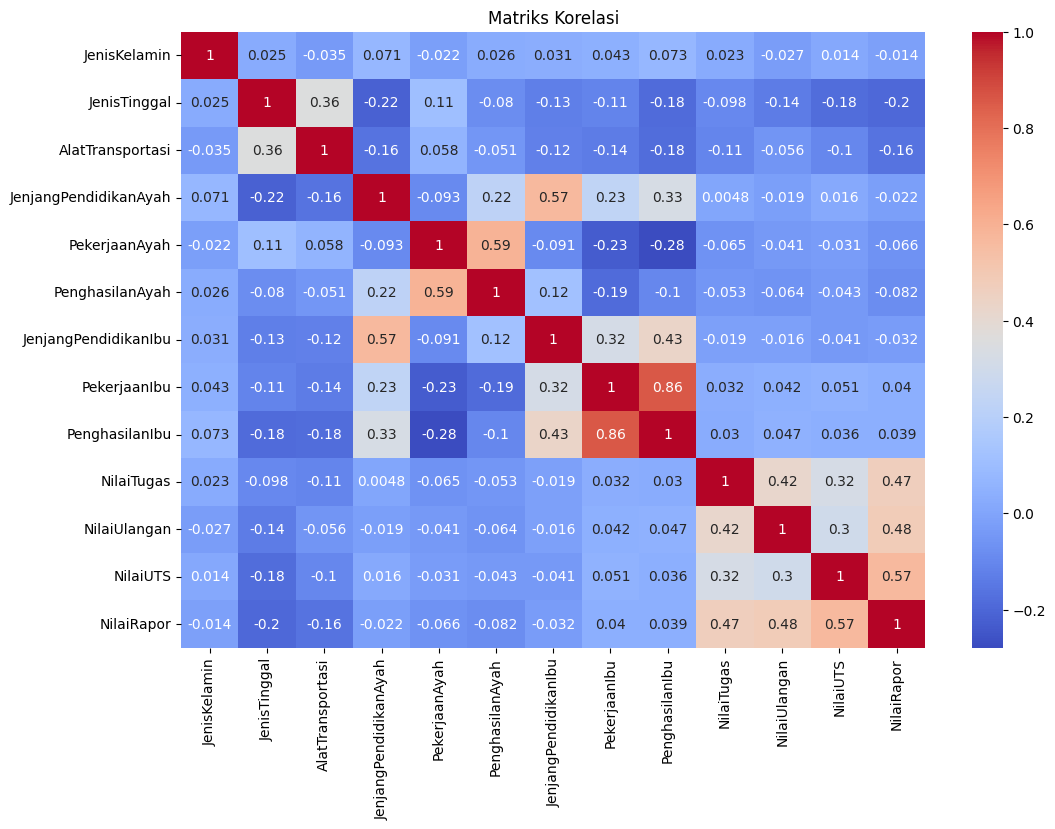

In [ ]:
# Membuat matriks korelasi dan heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

### Define The ANN Model Architecture

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(3, 5, 5), activation='relu', alpha= 0.001, max_iter=3000, random_state=42, early_stopping=True)

In [ ]:
model.fit(X_train_scaled, Y_train_scaled)

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(3, 5, 5),
             max_iter=3000, random_state=42)

In [ ]:
NilaiRapor = model.predict(X_test_scaled)

In [ ]:
prediction = pd.DataFrame({'Y_test_scaled':Y_test_scaled, 'NilaiRapor': NilaiRapor})
prediction.head()

,Y_test_scaled,NilaiRapor
0,0.714462,-0.378938
1,-0.379333,-0.343781
2,-0.743932,-0.702161
3,-0.379333,0.064879
4,-0.743932,-0.359380


In [ ]:
Y_test_scaled = scaler_Y.inverse_transform(Y_test_scaled.reshape(-1,1)).flatten()

In [ ]:
NilaiRapor = scaler_Y.inverse_transform(NilaiRapor.reshape(-1,1)).flatten()

In [ ]:
comparison_df = pd.DataFrame({'Y_test_scaled': Y_test_scaled, 'NilaiRapor': NilaiRapor})
# prediction.head()

In [ ]:
print(comparison_df.head())

   Y_test_scaled  NilaiRapor
0           78.0   69.003252
1           69.0   69.292533
2           66.0   66.343703
3           69.0   72.655082
4           66.0   69.164182


In [ ]:
mae = mean_absolute_error(Y_test, NilaiRapor)
print(f"MAE: {mae:.2f}")

MAE: 4.03


In [ ]:
mse = mean_squared_error(Y_test, NilaiRapor)
print(f"MSE: {mse:.2f}")

MSE: 28.61


In [ ]:
r2 = r2_score(Y_test, NilaiRapor)
print(f"R2: {r2:.2f}")

R2: 0.55
